In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

In [3]:
data=pd.read_csv('test_point.dat', header = None, sep = ' ')
data1=data.dropna(axis=1)

In [4]:
data1.shape[1]
#data1.iloc[:,3]

24576

In [5]:
ols=linear_model.LinearRegression()

In [6]:
ols.fit(data1.iloc[:,3:5], data1.iloc[:,5:data1.shape[1]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
ols.coef_

array([[-0.26978204, -0.16841232],
       [-9.02129819, -5.86869578],
       [ 1.88080625,  2.65949904],
       ...,
       [ 9.79180159,  5.86471328],
       [ 2.87887803,  0.57062022],
       [ 7.79546263,  3.59248325]])

In [8]:
print "maximum error =", np.max(ols.predict(data1.iloc[:,3:5])-data1.iloc[:,5:data1.shape[1]].values)

maximum error = 0.0008663649047082611


In [9]:
def generate_ractangle(Nx, Ny, Lx, Ly, center_x, center_y, theta_grad):
    
    theta=theta_grad*np.pi/180.0
    M=[[np.cos(theta),np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    rectangle_x=np.zeros([Nx,Ny])
    rectangle_y=np.zeros([Nx,Ny])
    dx=Lx/float(Nx);
    dy=Ly/float(Ny);
    for j in xrange(Nx):
        for k in xrange(Ny):
            [x,y]=np.dot(M,[j*dx-Lx/2.0, k*dy-Ly/2.0]);
            rectangle_x[j,k]=x + center_x;
            rectangle_y[j,k]=y + center_y;
    
           
    return rectangle_x, rectangle_y, M

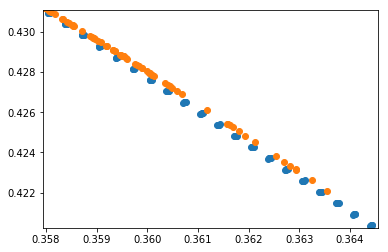

In [25]:
rectangle_x=np.zeros([20,5])
center_x=0.5*(data1.iloc[:,3].max()+data1.iloc[:,3].min())
center_y=0.5*(data1.iloc[:,4].max()+data1.iloc[:,4].min())
rectangle_x, rectangle_y, M = generate_ractangle(20, 5, 0.013, 0.00007, center_x*1.0002, center_y,59.0)
plt.axis([np.min(rectangle_x)-0.0001,np.max(rectangle_x)+0.0001,np.min(rectangle_y)-0.0001,np.max(rectangle_y)+0.0001])
plt.scatter(rectangle_x,rectangle_y)
plt.scatter(data1.iloc[:,3],data1.iloc[:,4])

In [27]:
#ols.predict(data1.iloc[:,3:5])
rectangle=np.zeros([100,2])
count=0
for j in xrange(20):
    for k in xrange(5):
        rectangle[count,0]=rectangle_x[j,k]
        rectangle[count,1]=rectangle_y[j,k]
        count=count+1



(100, 24576) (100, 24576)


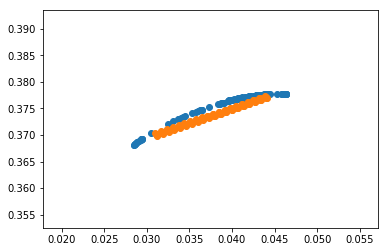

In [32]:
projections0=ols.predict(rectangle)
projections=np.zeros([data1.shape[0],data1.shape[1]])
projections[:,5:data1.shape[1]]=projections0[:,0:projections0.shape[1]]
projections[:,3:5]=rectangle[:,:]
print data1.shape, projections.shape

plt.scatter(data1.iloc[:,222],data1.iloc[:,2800])
plt.scatter(projections[:,222],projections[:,2800])

#write_out(projections)

np.savetxt('test_point_6.dat', projections, fmt='%.16e')

In [66]:
data_res=pd.read_csv('test_point_out_6_2.dat', header = None, sep = ' ')
data_res1=data_res.dropna(axis=1)

In [67]:
def print_out_pos(filename, data_x, data_y):
    S=data_x.size
    outF = open(filename, "w")
    outF.write("View \"%s\"{\n" % filename)
    for x in xrange(S):
        outF.write("SP(%.16le,%.16le,0.0){%i};\n" % (data_x[x], data_y[x],x))
    
    outF.write("};")
    outF.close();
    
    
    

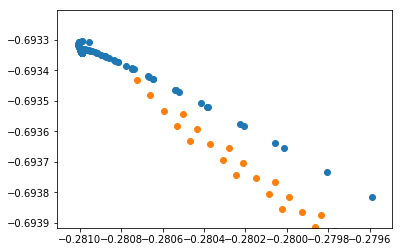

In [68]:
px=21020#234
py=10011#4111
plt.axis([np.min(data_res1.iloc[:,px])-0.0001,np.max(data_res1.iloc[:,px])+0.0001,np.min(data_res1.iloc[:,py])-0.0001,np.max(data_res1.iloc[:,py])+0.0001])
plt.scatter(data_res1.iloc[:,px],data_res1.iloc[:,py])
plt.scatter(projections[:,px],projections[:,py])
print_out_pos("test6_2_2.pos",projections[:,px],projections[:,py])
print_out_pos("test6_2_3.pos",data_res1.iloc[:,px],data_res1.iloc[:,py])

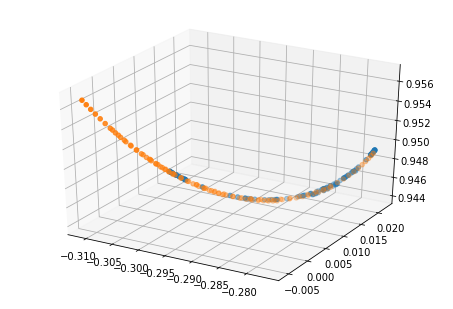

In [23]:
px=312
py=3424
pz=54
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data1.iloc[:,px],data1.iloc[:,py],data1.iloc[:,pz])
#ax.scatter(ols.predict(data1.iloc[:,3:5])[:,1130],ols.predict(data1.iloc[:,3:5])[:,12183],ols.predict(data1.iloc[:,3:5])[:,66])
ax.scatter(data_res1.iloc[:,px],data_res1.iloc[:,py],data_res1.iloc[:,pz])